In [1]:
from google.colab import files
uploaded = files.upload()

Saving deutsche_bank_financial_performance.csv to deutsche_bank_financial_performance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_performance = pd.read_csv('deutsche_bank_financial_performance.csv')

In [3]:
display(df_performance.head())


,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
0,1/1/2015,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,1/2/2015,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,1/3/2015,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,1/4/2015,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,1/5/2015,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51


In [6]:
correlation_matrix = df_performance.corr(numeric_only=True)

In [5]:
numeric_df = df_performance.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

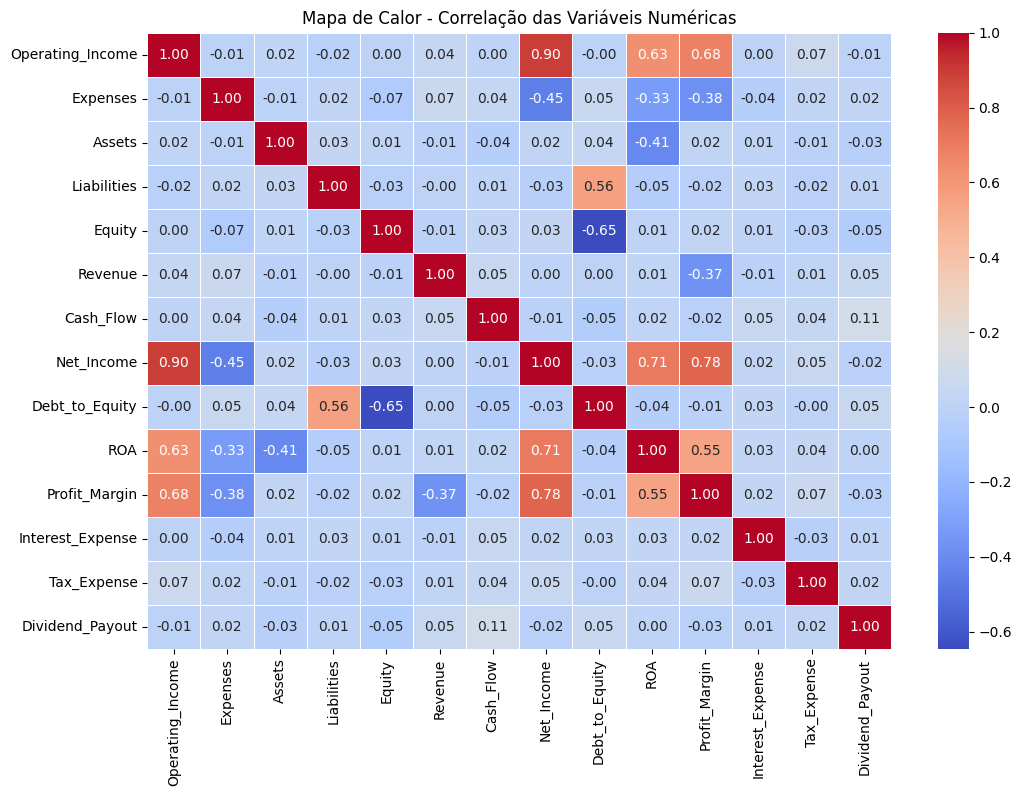

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlação das Variáveis Numéricas')
plt.show()